In [10]:
from keras.layers import SimpleRNN

In [11]:
# Create and fit the Stacked RNN model
stacked_model = Sequential()
stacked_model.add(SimpleRNN(50, return_sequences=True, input_shape=(look_back, 1)))
stacked_model.add(SimpleRNN(50))
stacked_model.add(Dense(1))
stacked_model.compile(loss='mean_squared_error', optimizer='adam')
stacked_model.fit(X, y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


140/140 - 3s - 18ms/step - loss: 0.0165
Epoch 2/100
140/140 - 0s - 2ms/step - loss: 0.0087
Epoch 3/100
140/140 - 0s - 2ms/step - loss: 0.0053
Epoch 4/100
140/140 - 0s - 2ms/step - loss: 0.0065
Epoch 5/100
140/140 - 0s - 2ms/step - loss: 0.0052
Epoch 6/100
140/140 - 0s - 2ms/step - loss: 0.0064
Epoch 7/100
140/140 - 1s - 6ms/step - loss: 0.0047
Epoch 8/100
140/140 - 1s - 4ms/step - loss: 0.0051
Epoch 9/100
140/140 - 1s - 5ms/step - loss: 0.0045
Epoch 10/100
140/140 - 1s - 4ms/step - loss: 0.0065
Epoch 11/100
140/140 - 1s - 4ms/step - loss: 0.0045
Epoch 12/100
140/140 - 0s - 3ms/step - loss: 0.0046
Epoch 13/100
140/140 - 1s - 4ms/step - loss: 0.0046
Epoch 14/100
140/140 - 1s - 5ms/step - loss: 0.0048
Epoch 15/100
140/140 - 1s - 5ms/step - loss: 0.0051
Epoch 16/100
140/140 - 1s - 4ms/step - loss: 0.0043
Epoch 17/100
140/140 - 0s - 2ms/step - loss: 0.0046
Epoch 18/100
140/140 - 1s - 4ms/step - loss: 0.0042
Epoch 19/100
140/140 - 0s - 2ms/step - loss: 0.0041
Epoch 20/100
140/140 - 1s - 5ms/

In [12]:
# Make predictions
stacked_train_predict = stacked_model.predict(X)
stacked_train_predict = scaler.inverse_transform(stacked_train_predict)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


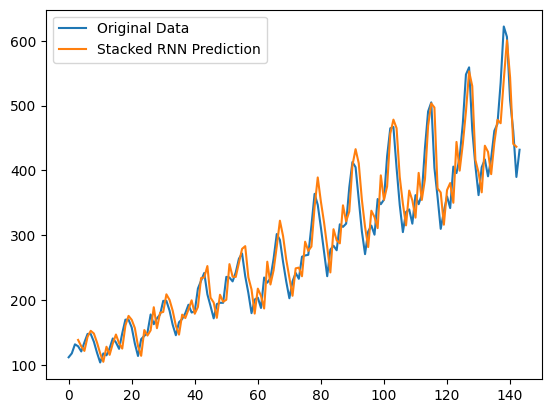

In [13]:
# Plot results
plt.plot(scaler.inverse_transform(data_scaled), label='Original Data')
plt.plot(np.arange(look_back, len(stacked_train_predict) + look_back), stacked_train_predict, label='Stacked RNN Prediction')
plt.legend()
plt.show()

In [14]:
# Calculate performance
stacked_mse = mean_squared_error(y_true[0], stacked_train_predict.flatten())
print(f"Stacked RNN Mean Squared Error: {stacked_mse}")

Stacked RNN Mean Squared Error: 899.7745764386971
